In [1]:
import tensorflow
#import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

#Creiamo una CNN, la quale avrà tre fasi: convoluzione, pooling e appiattimento
classifier = Sequential()

# CONVOLUTION
#Qui stiamo stabilendo come deve avvenire la convoluzione, ovvero vogliamo suddividere i pixel delle immagini secondo dei filtri.
#Si fa con Conv2D, in cui specifichiamo il numero di filtri = 32 e quanto deve essere grande la matrice dei filtri = 4 x 4. N.B. Li ho scelti a caso.
#input_shape indica con che forma ci si aspetta l'input, nel nostro caso sono foto 200 x 200. 3 è un numero che ogni pixel è combinazione di 3 valori RGB.
#Infine si sceglie la funzione di attivazione, in questo caso la RELU.
classifier.add(Conv2D(32, (4, 4), input_shape = (200, 200, 3), activation = 'relu'))

# POOLING
#Nella fase di pooling scegliamo come devono essere creati i pool a partire dalle matrici ottenute dalla convoluzione. 
#MaxPooling significa dire che si sceglie per ogni regione della matrice di convoluzione il valore massimo, e questo viene inserito nella nuova matrice di pooling.
#pool_size 2 x 2 indica ogni quanto deve trovare e inserire un valore massimo dalla matrice di convoluzione.
classifier.add(MaxPooling2D(pool_size = (6,6)))

#FLATTENING
#Bisogna trasformare tutte le matrici ottenute dalla fase di pooling in array monodimensionali, poiché questa è una forma di input accettabile da una rete neurale.
#Una funzione fa tutto da sola.
classifier.add(Flatten())


classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 197, 197, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________


In [2]:
#FULL CONNECTION
#Ora bisogna creare l'effettiva rete neurale. Bisogna crearne una classica multistrato alimentata in avanti.
#La dimensione dell'input sarà la dimensione dell'output creato dalla fase di appiattimento, quindi 307.328. Quella di output la specifichiamo noi, ho messo a caso 300.
classifier.add(Dense(800, activation = 'relu'))

#Crediamo il classificatore che preso l'output della precedente iterazione assegna effettivamente una classe. 28 nel nostro caso è il numero di risposte possibili 
#(tutte le lettere + caso nullo + carattere di spazio + carattere di delete) = 28
classifier.add(Dense(29, activation = 'sigmoid'))

#COMPILING
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print("Done")

Done


In [12]:
from keras.preprocessing.image import ImageDataGenerator


#DATA PREPARATION FOR THE CNN
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip = True)


training_set = train_datagen.flow_from_directory('Dataset/asl_alphabet_train/asl_alphabet_train', 
                                                 target_size = (200, 200),
                                                 batch_size = 47,
                                                 class_mode = 'categorical',
                                                 subset='training')

validation_set = train_datagen.flow_from_directory('Dataset/asl_alphabet_train/asl_alphabet_train',
                                                    target_size = (200, 200),
                                                    batch_size = 11,
                                                    class_mode = 'categorical',
                                                    subset = 'validation')

print("Done")

Found 69607 images belonging to 29 classes.
Found 17401 images belonging to 29 classes.
Done


In [14]:
print("Training is about to start")

data_history = classifier.fit(training_set, 
                              steps_per_epoch = 160,#prova 100
                              epochs = 32,
                              validation_data = validation_set,
                              validation_steps = 29)

print("DONE!!!")

#early stopping e salva il migliore
#aggiungi val nei dati

Training is about to start
Epoch 1/32
160/160 [==============================] - 108s 677ms/step - loss: 0.1344 - accuracy: 0.2170 - val_loss: 0.1212 - val_accuracy: 0.2132
Epoch 2/32
160/160 [==============================] - 107s 668ms/step - loss: 0.0985 - accuracy: 0.4270 - val_loss: 0.1114 - val_accuracy: 0.3197
Epoch 3/32
160/160 [==============================] - 106s 663ms/step - loss: 0.0807 - accuracy: 0.5537 - val_loss: 0.1066 - val_accuracy: 0.3448
Epoch 4/32
160/160 [==============================] - 105s 659ms/step - loss: 0.0686 - accuracy: 0.6394 - val_loss: 0.1055 - val_accuracy: 0.3824
Epoch 5/32
160/160 [==============================] - 105s 656ms/step - loss: 0.0593 - accuracy: 0.7065 - val_loss: 0.1122 - val_accuracy: 0.3824
Epoch 6/32
160/160 [==============================] - 104s 652ms/step - loss: 0.0520 - accuracy: 0.7447 - val_loss: 0.1137 - val_accuracy: 0.3605
Epoch 7/32
160/160 [==============================] - 104s 650ms/step - loss: 0.0455 - accuracy: 

In [15]:
print("Saving...")

classifier.save_weights('weights.h5')

print("Saved!")

Saving...
Saved!


In [16]:
classifier.load_weights("weights.h5")

print("Loaded")

Loaded


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


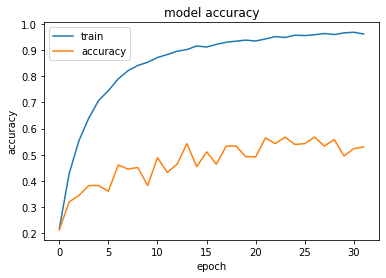

In [32]:
import matplotlib.pyplot as plt

class_labels = ["A", "B", "C", "D", "del", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "nothing", "O", "P", "Q", "R",
                "S", "space", "T", "U", "V", "W", "X", "Y", "Z"]

print(data_history.history.keys())


plt.plot(data_history.history['accuracy'])
plt.plot(data_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'accuracy'], loc = 'upper left')
plt.show()

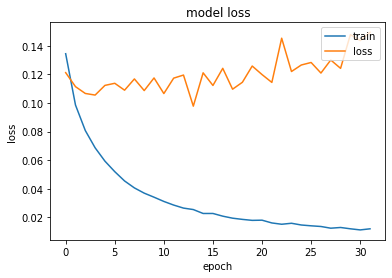

In [33]:
plt.plot(data_history.history['loss'])
plt.plot(data_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc = 'upper right')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

testing_set = test_datagen.flow_from_directory('Dataset/asl_alphabet_test',
                                                target_size = (200, 200),
                                                class_mode = 'categorical')

y_pred = classifier.predict(testing_set)

results = []
y_true = []
i = 0
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(i)
    i+=1
    
print(results)
print(y_true)

accuracy_score(results, y_true)


Found 29 images belonging to 1 classes.
[20, 2, 4, 28, 14, 25, 9, 13, 26, 3, 7, 11, 23, 27, 24, 8, 21, 5, 6, 15, 12, 10, 16, 22, 17, 1, 19, 0, 18]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


0.034482758620689655

In [140]:
#Per cambiare la struttura 
def build_classifier():
    classifier = Sequential()
    classifier.add(Conv2D(32, (4, 4), input_shape = (200, 200, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (6,6)))
    classifier.add(Flatten())
    
    classifier.add(Dense(400, activation = 'relu'))
    classifier.add(Dense(29, activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', 
                       loss = 'binary_crossentropy', 
                       metrics = ['accuracy', 'val_accuracy', 'loss', 'val_loss'])

    classifier.summary()
    return classifier    

In [ ]:
print("Training is about to start")

callback = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

#Ancora uguale, smanettaci 
data_history2 = classifier.fit(training_set, 
                              steps_per_epoch = 160,
                              epochs = 32,#prbabilmente di meno è meglio
                              validation_data = validation_set,
                              validation_steps = 29#aumenta di tanto
                              callbacks = [callbacks])

print("DONE!!!")